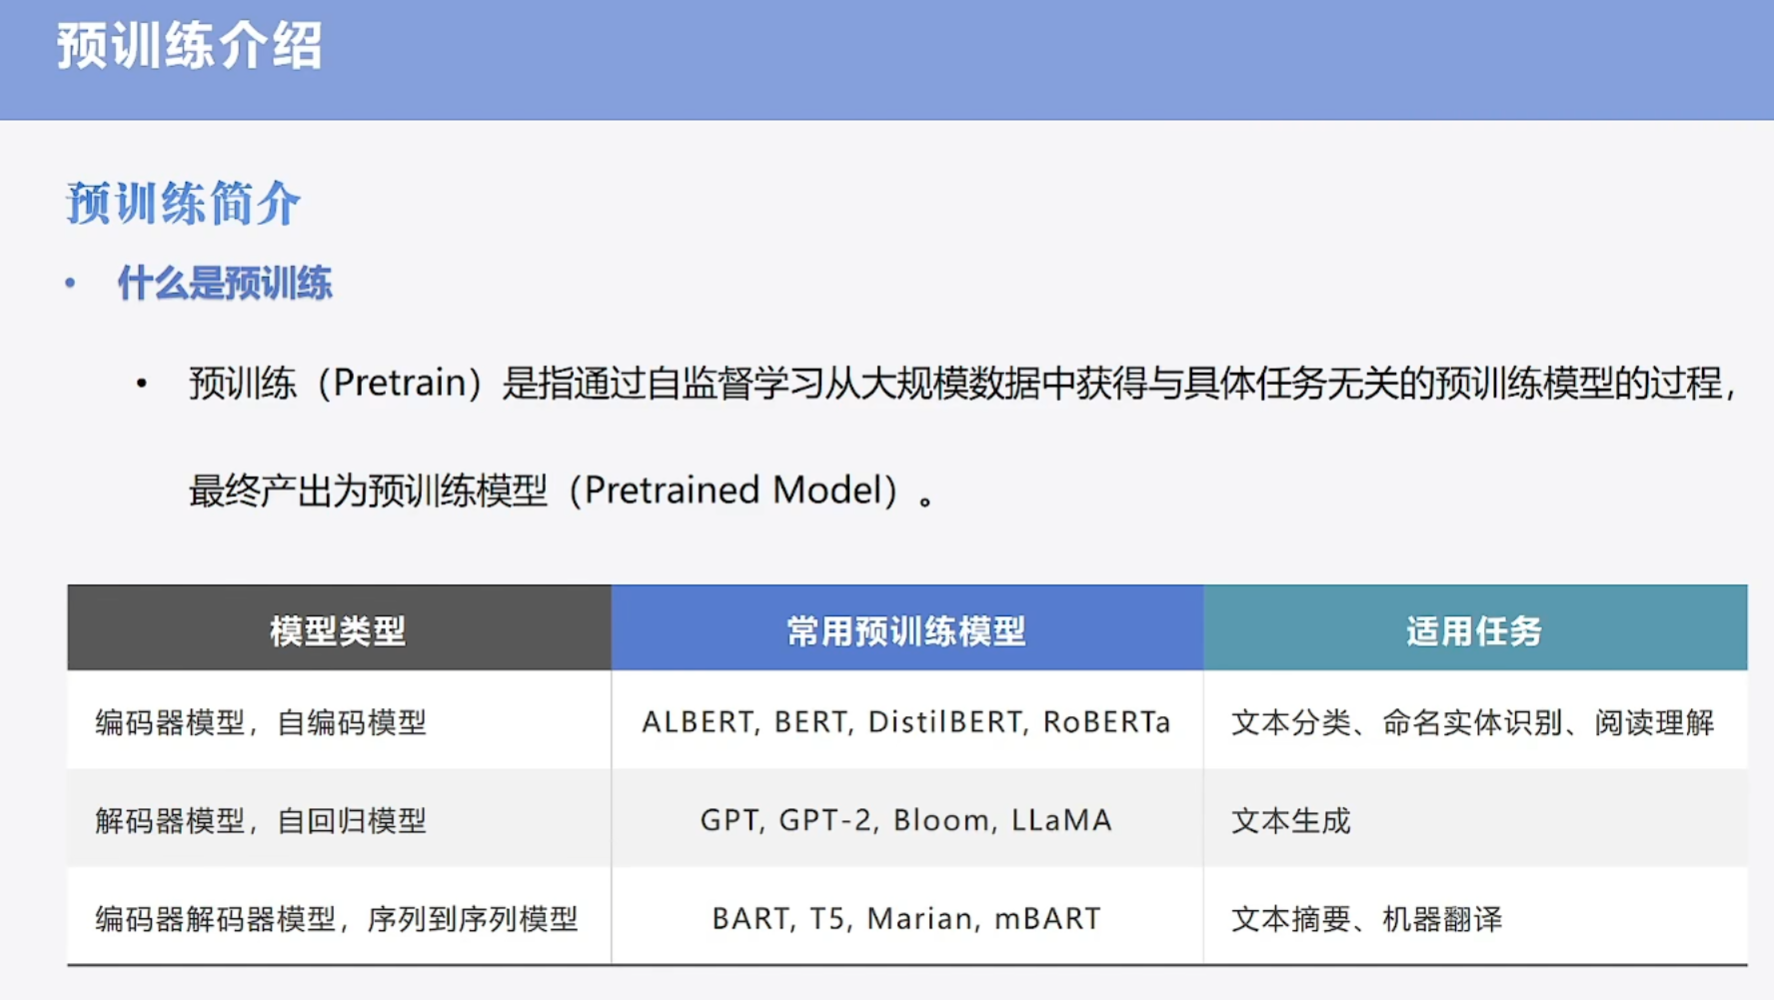

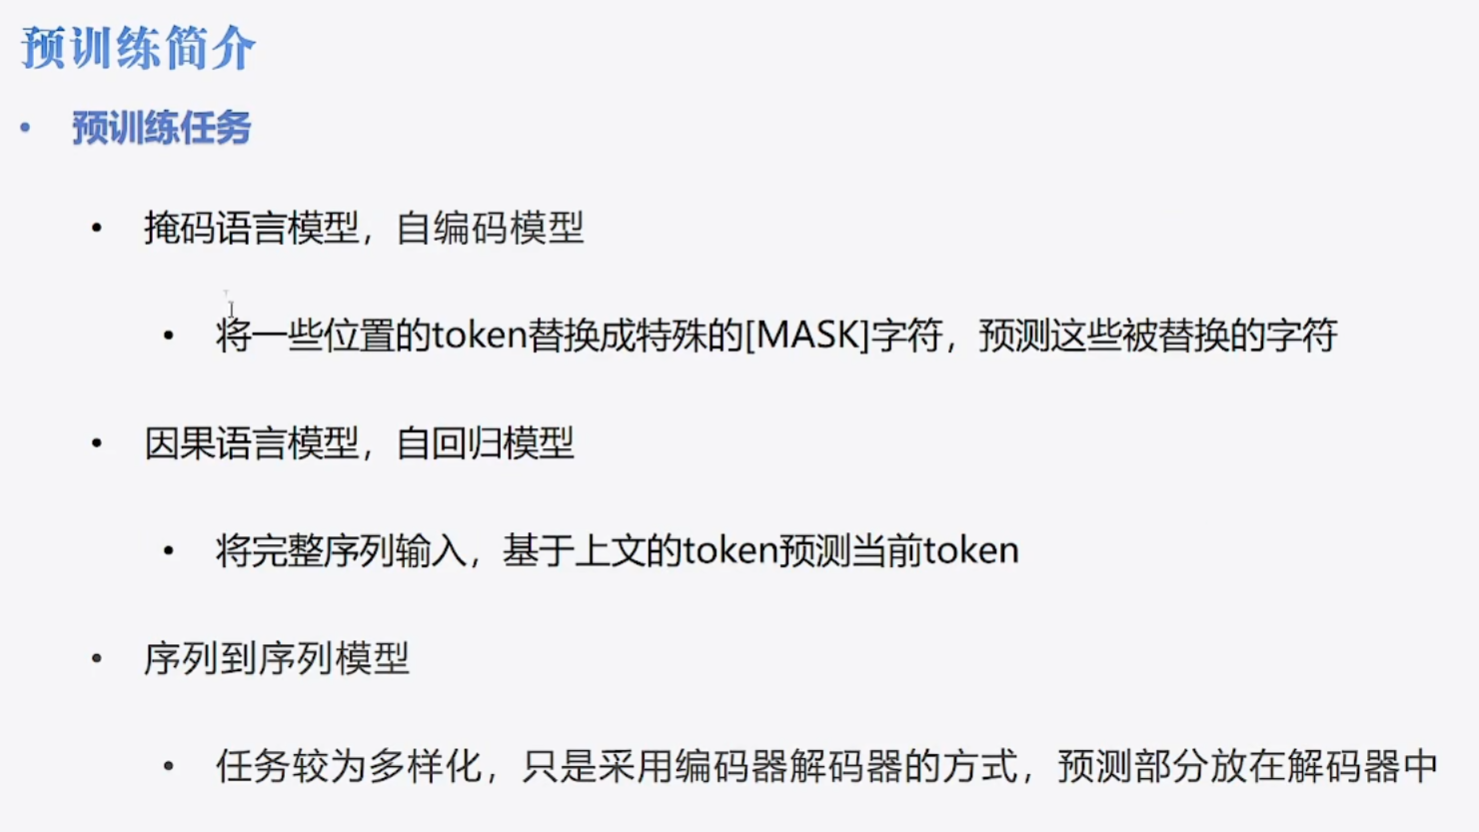

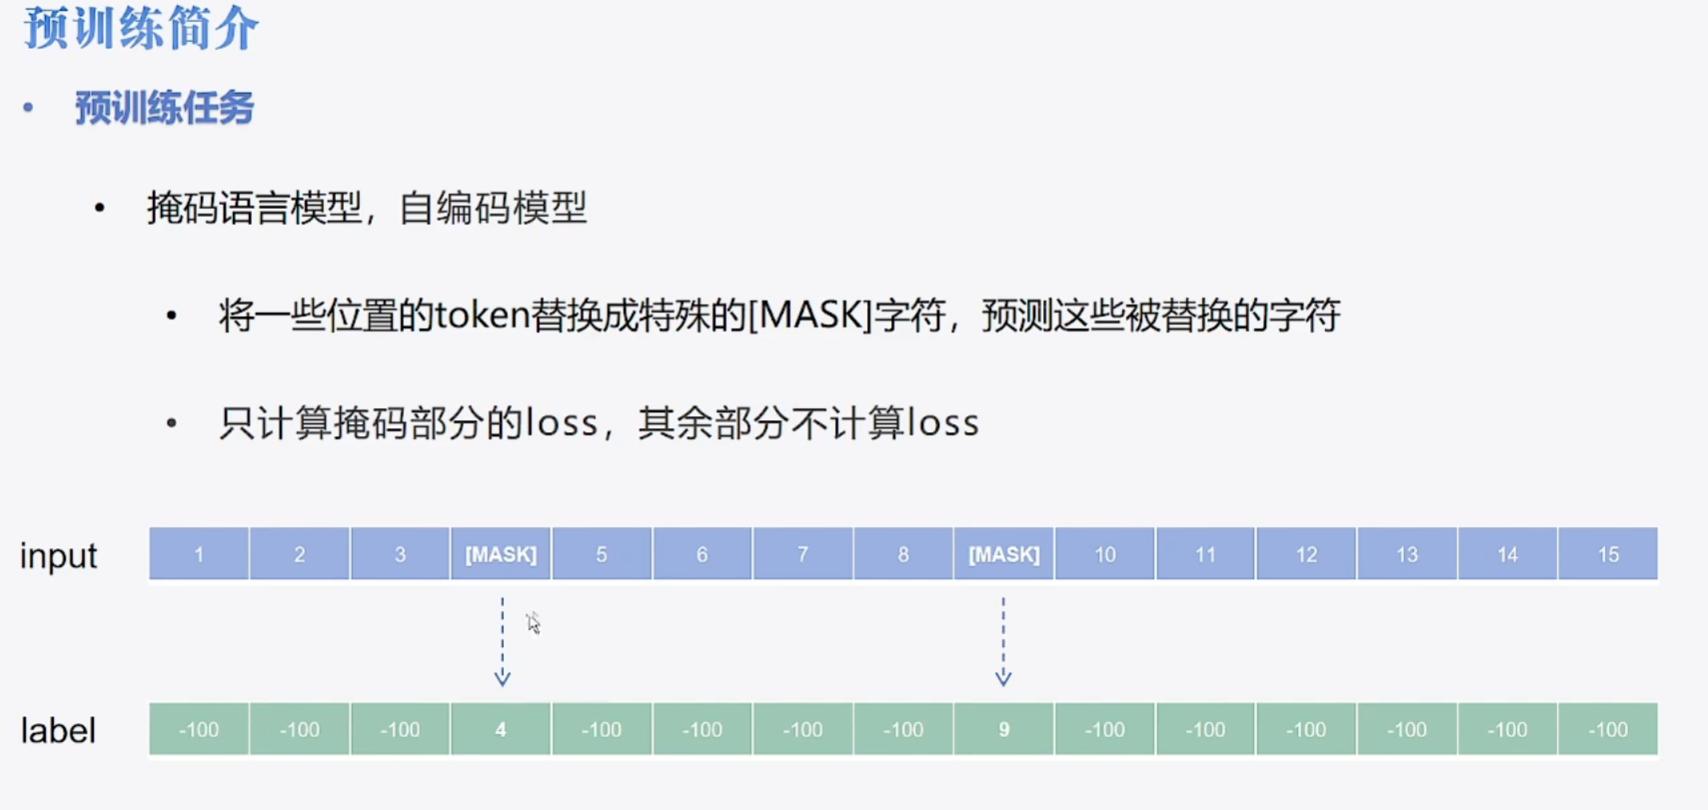

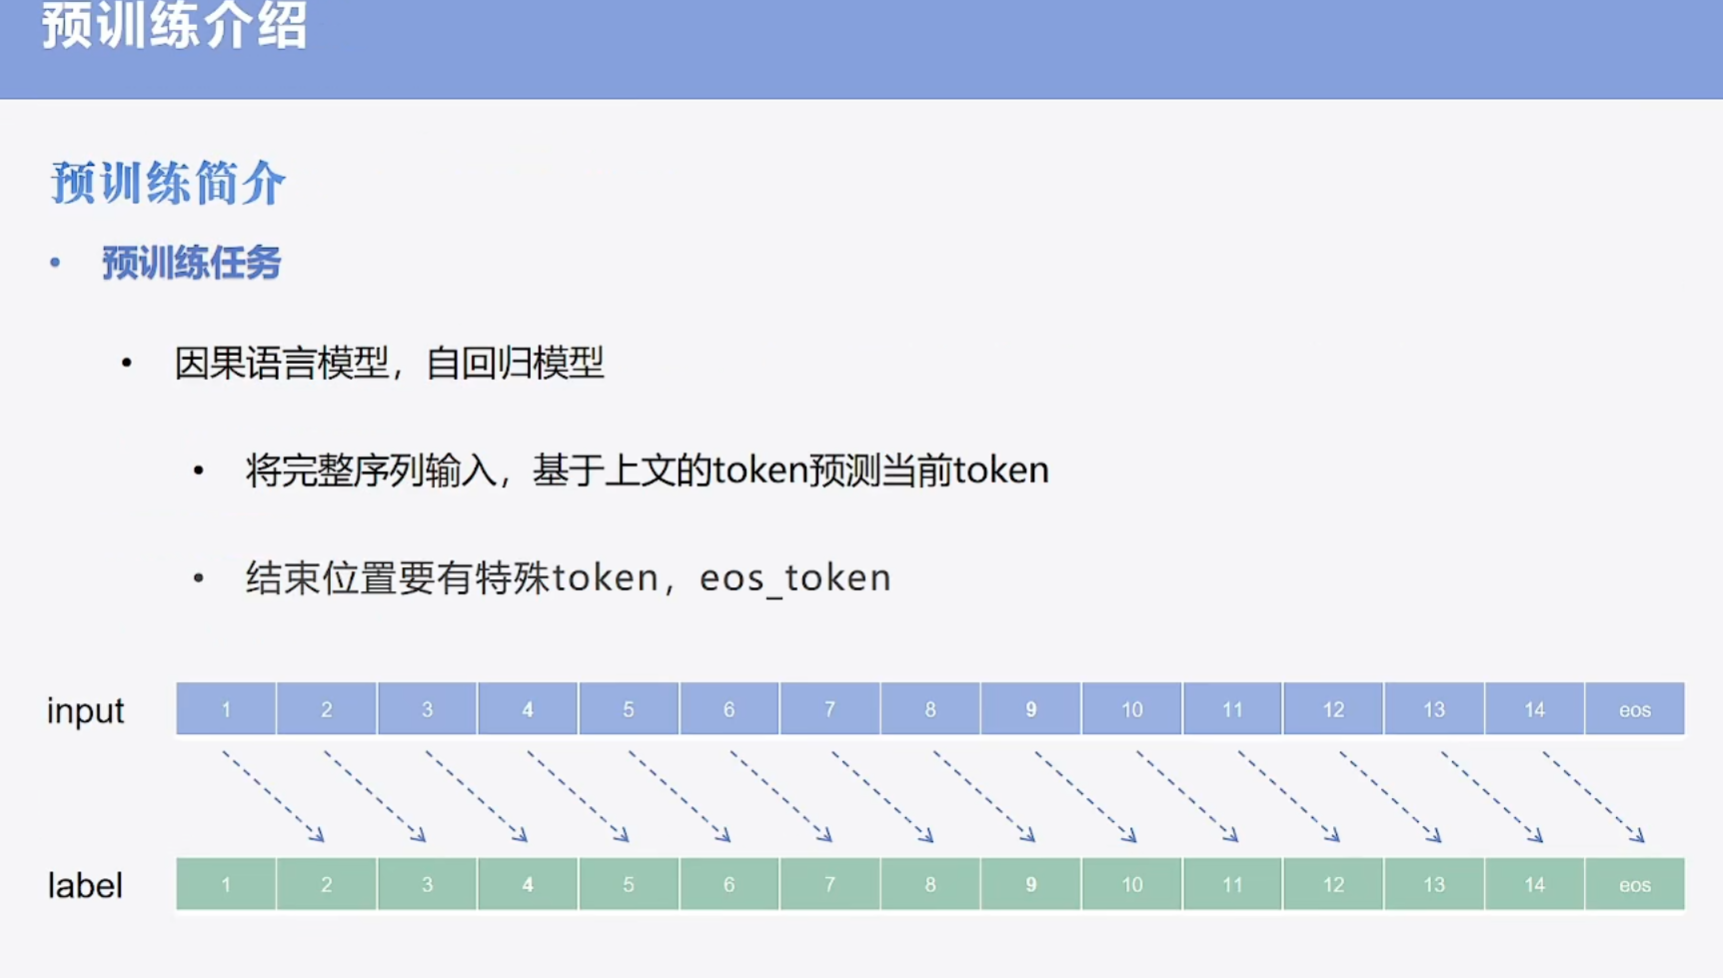

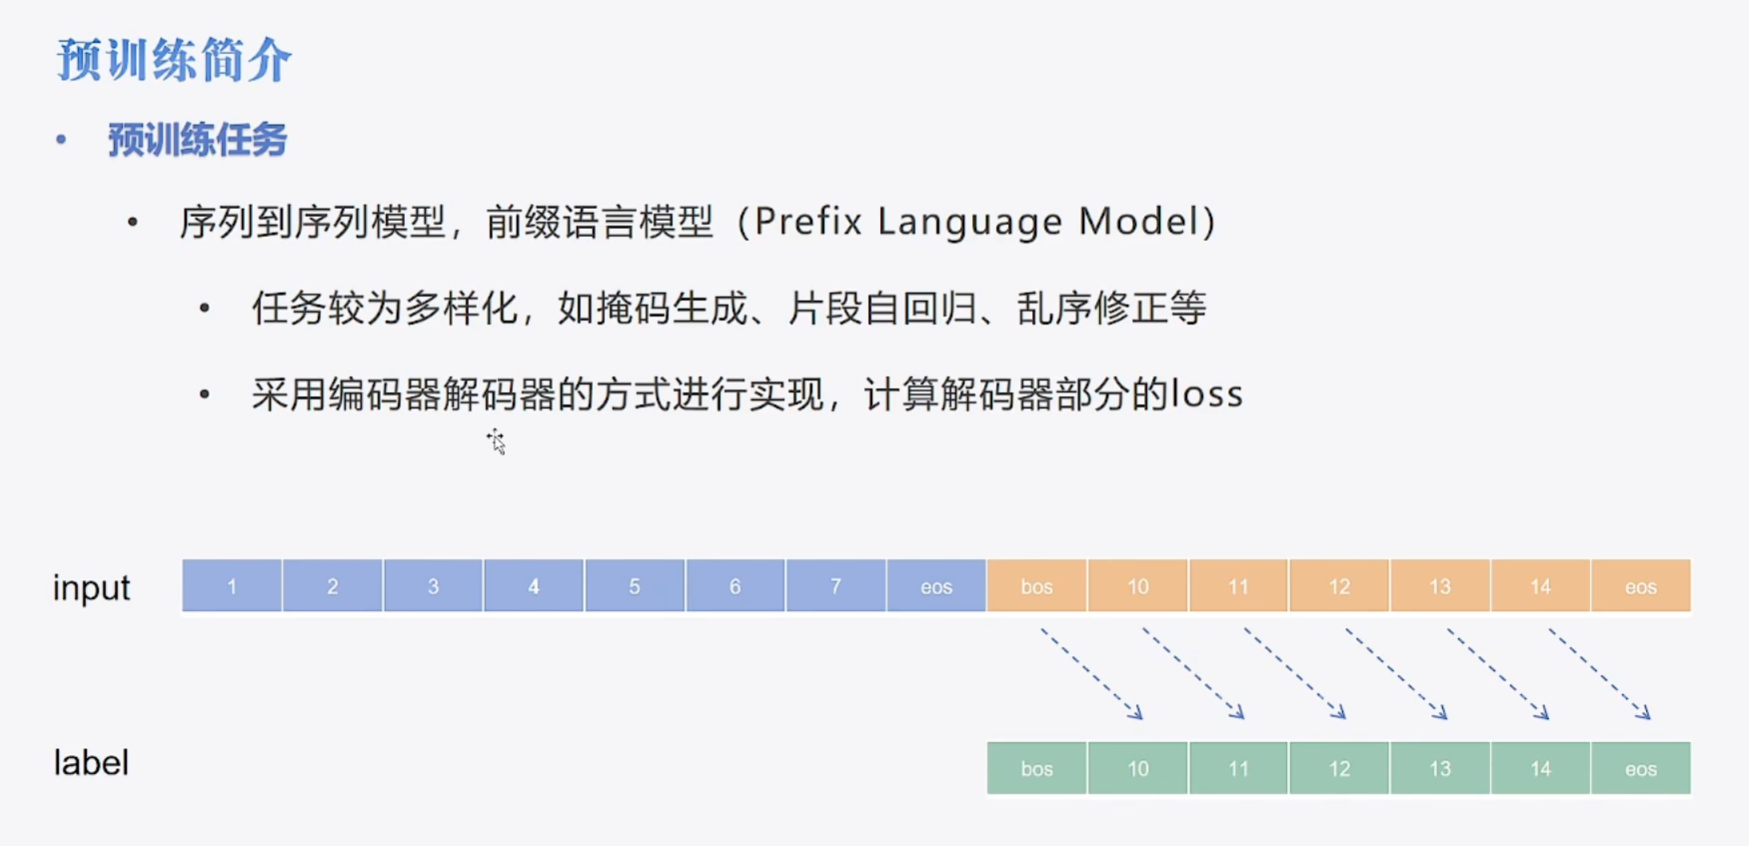

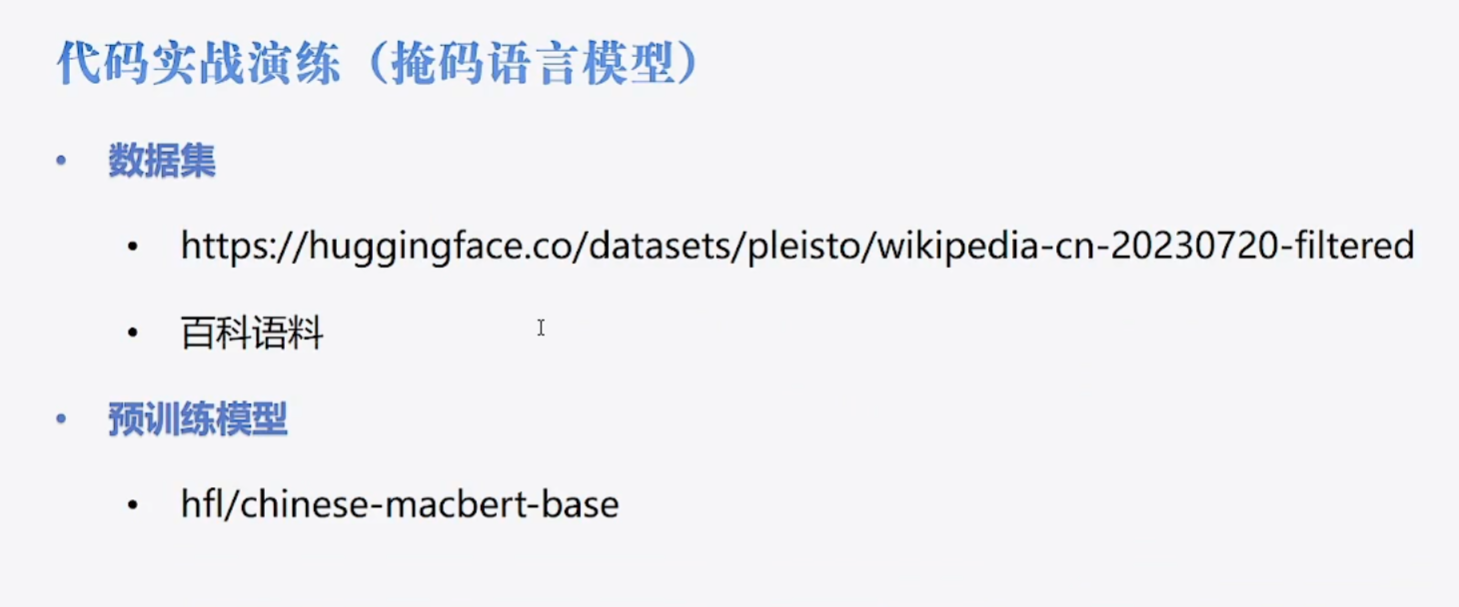

## 掩码语言训练实例

## Step1 导入包

In [1]:
from datasets import load_dataset,Dataset
from transformers import AutoTokenizer, AutoModelForMaskedLM,DataCollatorForLanguageModeling,TrainingArguments,Trainer

## Step2 加载数据集

In [2]:
ds=Dataset.load_from_disk('./wiki_cn_filtered/')
ds

Dataset({
    features: ['source', 'completion'],
    num_rows: 10000
})

In [3]:
ds[0]

{'source': 'wikipedia.zh2307',
 'completion': "西安交通大学博物馆（Xi'an Jiaotong University Museum）是一座位于西安交通大学的博物馆，馆长是锺明善。\n历史\n2004年9月20日开始筹建，2013年4月8日正式建成开馆，位于西安交通大学兴庆校区陕西省西安市咸宁西路28号。建筑面积6,800平米，展厅面积4,500平米，馆藏文物4,900余件。包括历代艺术文物馆、碑石书法馆、西部农民画馆、邢良坤陶瓷艺术馆、陕西秦腔博物馆和书画展厅共五馆一厅。\n营业时间\n* 周一至周六：上午九点至十二点，下午一点至五点\n* 周日闭馆"}

## Step3 数据集处理

In [4]:
tokenizer = AutoTokenizer.from_pretrained("hfl/chinese-macbert-base")
def process_func(examples):
    return tokenizer(examples['completion'], truncation=True, padding='max_length', max_length=384)

In [5]:
tokenized_ds=ds.map(process_func,batched=True,remove_columns=ds.column_names)
tokenized_ds

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 10000
})

In [6]:
from torch.utils.data import DataLoader
# 这里面是对数据进行处理的，比如编码等

dl=DataLoader(tokenized_ds,batch_size=2,collate_fn=DataCollatorForLanguageModeling(tokenizer,mlm=True,mlm_probability=0.15))#mlm_probability掩码概率

In [7]:
next(enumerate(dl))

(0,
 {'input_ids': tensor([[  101,   103,  2128,   769,  6858,  1920,  2110,  1300,   103,  7667,
           8020, 13135,   112,  9064, 12095,  8731,  8626,  8181,  8736, 10553,
            103,  3221,   671,   103,   855,   754,  6205,  2128,   769,  6858,
            103,   103,  4638,  1300,  4289,  7667,  8024,  7667,  7270,  3221,
           7247,  3209,  1587,   511,  1325,   103,  8258,   103,   130, 18098,
           8113,   103,  2458,  1993,  5040,  2456,   103,  8138,  2399,   125,
           3299,   129,  3189,   103,  2466,  2456,  2768,  2458,  7667,  8024,
            855,   754,  6205,  2128,   103,  6858,   103,   103,  1069,  2412,
           3413,  1277,  7362,  6205,  4689,  6205,  2128,  2356,  1496,  2123,
            103,  6662,  8143,  1384,   511,  2456,  5029,  7481,  4916,   127,
            117,  8280,  2398,  5101,  8024,  2245,  1324,  7481,  4916,   125,
            103,  8195,  2398,   103,  8024,  7667,  5966,  3152,  4289,   103,
            117,  8567

In [8]:
tokenizer.mask_token,tokenizer.mask_token_id

('[MASK]', 103)

## Step4 创建模型

In [9]:
model=AutoModelForMaskedLM.from_pretrained("hfl/chinese-macbert-base")

Some weights of the model checkpoint at hfl/chinese-macbert-base were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Step5 配置训练参数

In [10]:
args=TrainingArguments(
    output_dir='./masked_lm',
    per_device_train_batch_size=32,
    logging_steps=10,
    num_train_epochs=1,
)

## Step6 创建训练器

In [11]:
trainer=Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_ds,
    data_collator=DataCollatorForLanguageModeling(tokenizer,mlm=True,mlm_probability=0.15)
)


## Step7 训练模型

In [12]:
trainer.train()

  0%|          | 0/313 [00:00<?, ?it/s]

{'loss': 1.3955, 'grad_norm': 3.660383939743042, 'learning_rate': 4.840255591054313e-05, 'epoch': 0.03}
{'loss': 1.4088, 'grad_norm': 3.2476751804351807, 'learning_rate': 4.680511182108626e-05, 'epoch': 0.06}
{'loss': 1.4051, 'grad_norm': 3.251861810684204, 'learning_rate': 4.520766773162939e-05, 'epoch': 0.1}
{'loss': 1.351, 'grad_norm': 3.349722146987915, 'learning_rate': 4.361022364217253e-05, 'epoch': 0.13}
{'loss': 1.3437, 'grad_norm': 3.1871423721313477, 'learning_rate': 4.201277955271566e-05, 'epoch': 0.16}
{'loss': 1.3139, 'grad_norm': 3.098660945892334, 'learning_rate': 4.041533546325879e-05, 'epoch': 0.19}
{'loss': 1.3991, 'grad_norm': 3.370054006576538, 'learning_rate': 3.8817891373801916e-05, 'epoch': 0.22}
{'loss': 1.323, 'grad_norm': 3.5094895362854004, 'learning_rate': 3.722044728434505e-05, 'epoch': 0.26}
{'loss': 1.3207, 'grad_norm': 2.9350945949554443, 'learning_rate': 3.562300319488818e-05, 'epoch': 0.29}
{'loss': 1.3918, 'grad_norm': 3.4477200508117676, 'learning_ra

TrainOutput(global_step=313, training_loss=1.3278338284538196, metrics={'train_runtime': 6667.5032, 'train_samples_per_second': 1.5, 'train_steps_per_second': 0.047, 'total_flos': 1973819658240000.0, 'train_loss': 1.3278338284538196, 'epoch': 1.0})

## Step8 模型推理

In [13]:
from transformers import pipeline
pipe=pipeline('fill-mask',model=model,tokenizer=tokenizer,device=0)


In [15]:
pipe('西安交通大[MASK]博物馆（Xian Jiaotong University Museum）是一座位于西安交通大学的博物馆')

[{'score': 0.9989593029022217,
  'token': 2110,
  'token_str': '学',
  'sequence': '西 安 交 通 大 学 博 物 馆 （ xian jiaotong university museum ） 是 一 座 位 于 西 安 交 通 大 学 的 博 物 馆'},
 {'score': 0.0009864865569397807,
  'token': 2119,
  'token_str': '學',
  'sequence': '西 安 交 通 大 學 博 物 馆 （ xian jiaotong university museum ） 是 一 座 位 于 西 安 交 通 大 学 的 博 物 馆'},
 {'score': 6.965905868128175e-06,
  'token': 1920,
  'token_str': '大',
  'sequence': '西 安 交 通 大 大 博 物 馆 （ xian jiaotong university museum ） 是 一 座 位 于 西 安 交 通 大 学 的 博 物 馆'},
 {'score': 4.02526438847417e-06,
  'token': 1398,
  'token_str': '同',
  'sequence': '西 安 交 通 大 同 博 物 馆 （ xian jiaotong university museum ） 是 一 座 位 于 西 安 交 通 大 学 的 博 物 馆'},
 {'score': 3.989081960753538e-06,
  'token': 3413,
  'token_str': '校',
  'sequence': '西 安 交 通 大 校 博 物 馆 （ xian jiaotong university museum ） 是 一 座 位 于 西 安 交 通 大 学 的 博 物 馆'}]